#### Jeffrey Bradley
#### 9/22/2020

###### Imports

In [274]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import scipy as sp
from sklearn.metrics import r2_score
from sklearn.metrics import log_loss
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report, confusion_matrix
import itertools


### Load Data

In [4]:
df1 = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df1.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df1.shape

(299, 13)

## Exploratory Data Analysis

###### All Columns Names

In [6]:
df1.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

###### All Data Types of Columns

In [7]:
#List data types
print(df1.dtypes)

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


##### Use scatter plot matrix to see if any linear relationships are visible. Save figure separately to view full figure size out of notebook

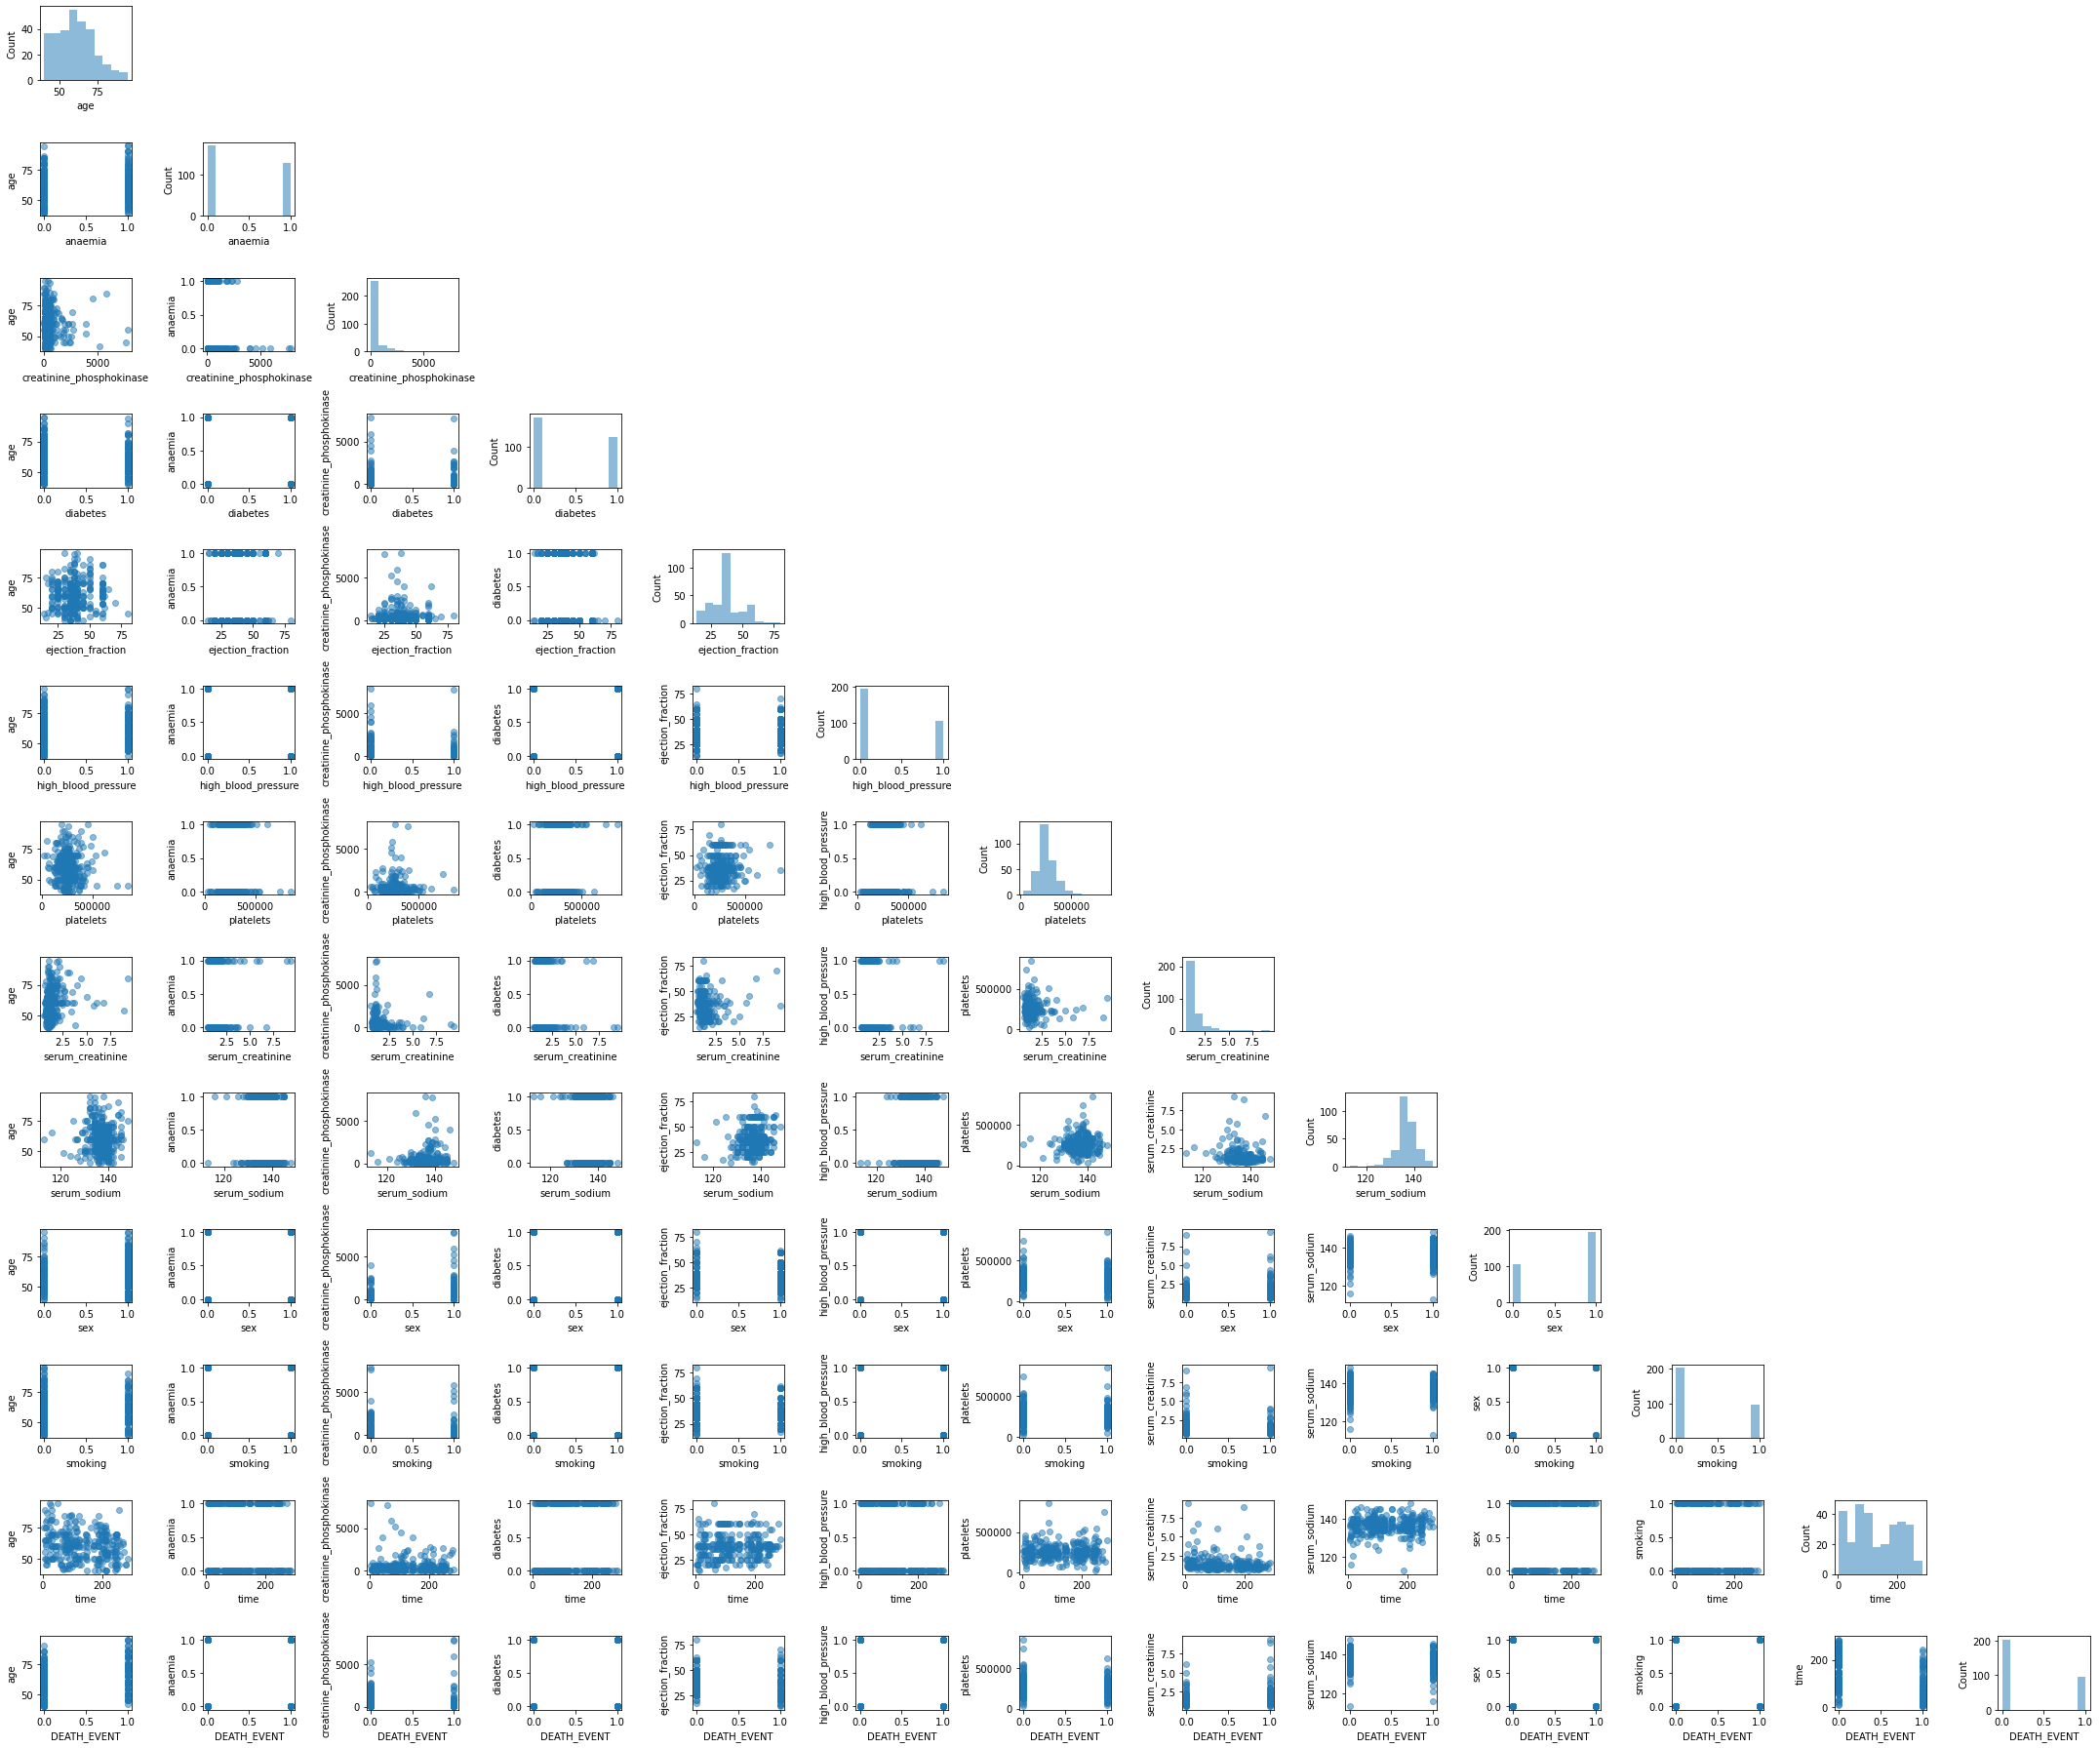

In [8]:
scatterplotmatrix(df1[df1.columns].values, figsize=(30, 25),names=df1.columns, alpha=0.5)
plt.tight_layout()
figure = plt.gcf()
figure.savefig('ScatterMatrix.png')
plt.show()

##### Nothing appears very linearly related. Lets look at a correlation coefficient heat map

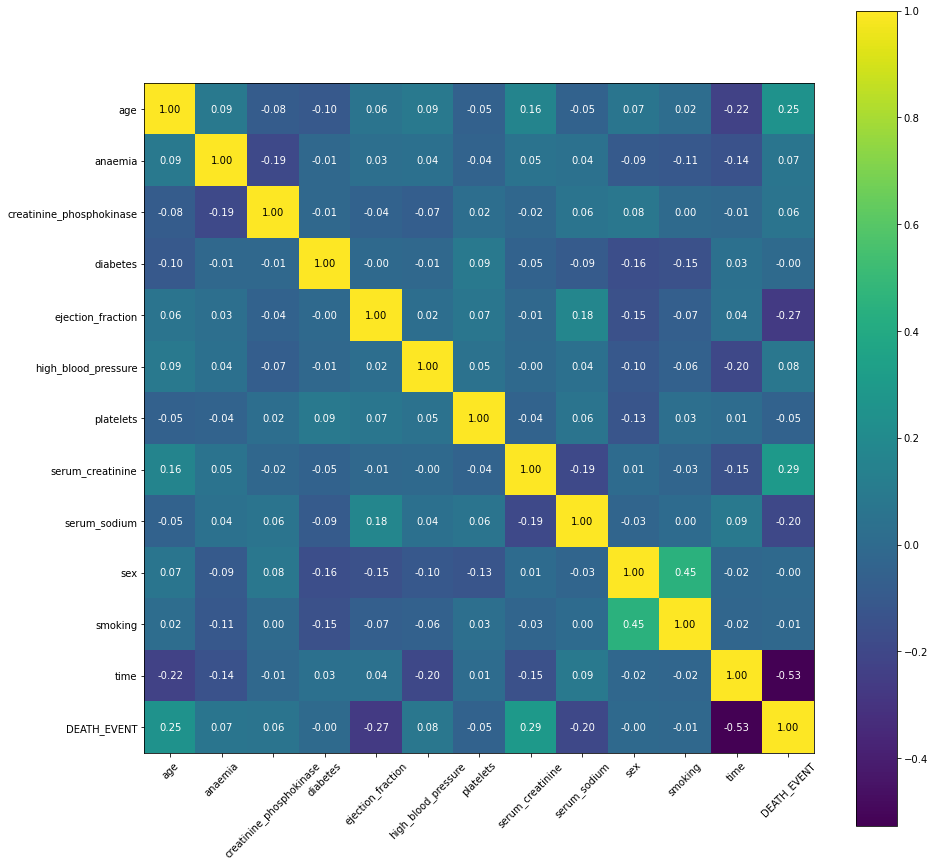

In [141]:
cm = np.corrcoef(df1[df1.columns].values.T)
hm = heatmap(cm, row_names=df1.columns, column_names=df1.columns, figsize = (15,15))
plt.show()

##### The heatmap reveals no strong linear relationships, we will look at the relationship between time and age because it has the strongest relationship among 2 non-binary features 

##### Let's look at a a regression plot with seaborn that I learned this summer in my Data Science Course

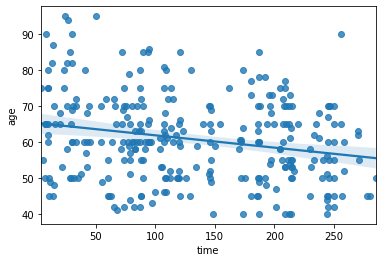

In [10]:
sns.regplot(x="time", y="age", data=df1)

##### What does time mean?
##### Number of days before the doctor saw the patient again.
##### Lets check out what some values are.

In [11]:
df1['time'].value_counts()


187    7
250    7
186    6
107    6
10     6
      ..
135    1
140    1
148    1
150    1
4      1
Name: time, Length: 148, dtype: int64

#### Use Histograms to show distribution of each columns data using subplots and figure drawing matplotlib.
##### enumerate has to be used to go through a dataframe object. In this case we are iterating across the columns to make a histogram of each
##### .hist makes the histogram, ax is the current plot being made, and bins is the number of bars the values are divided between

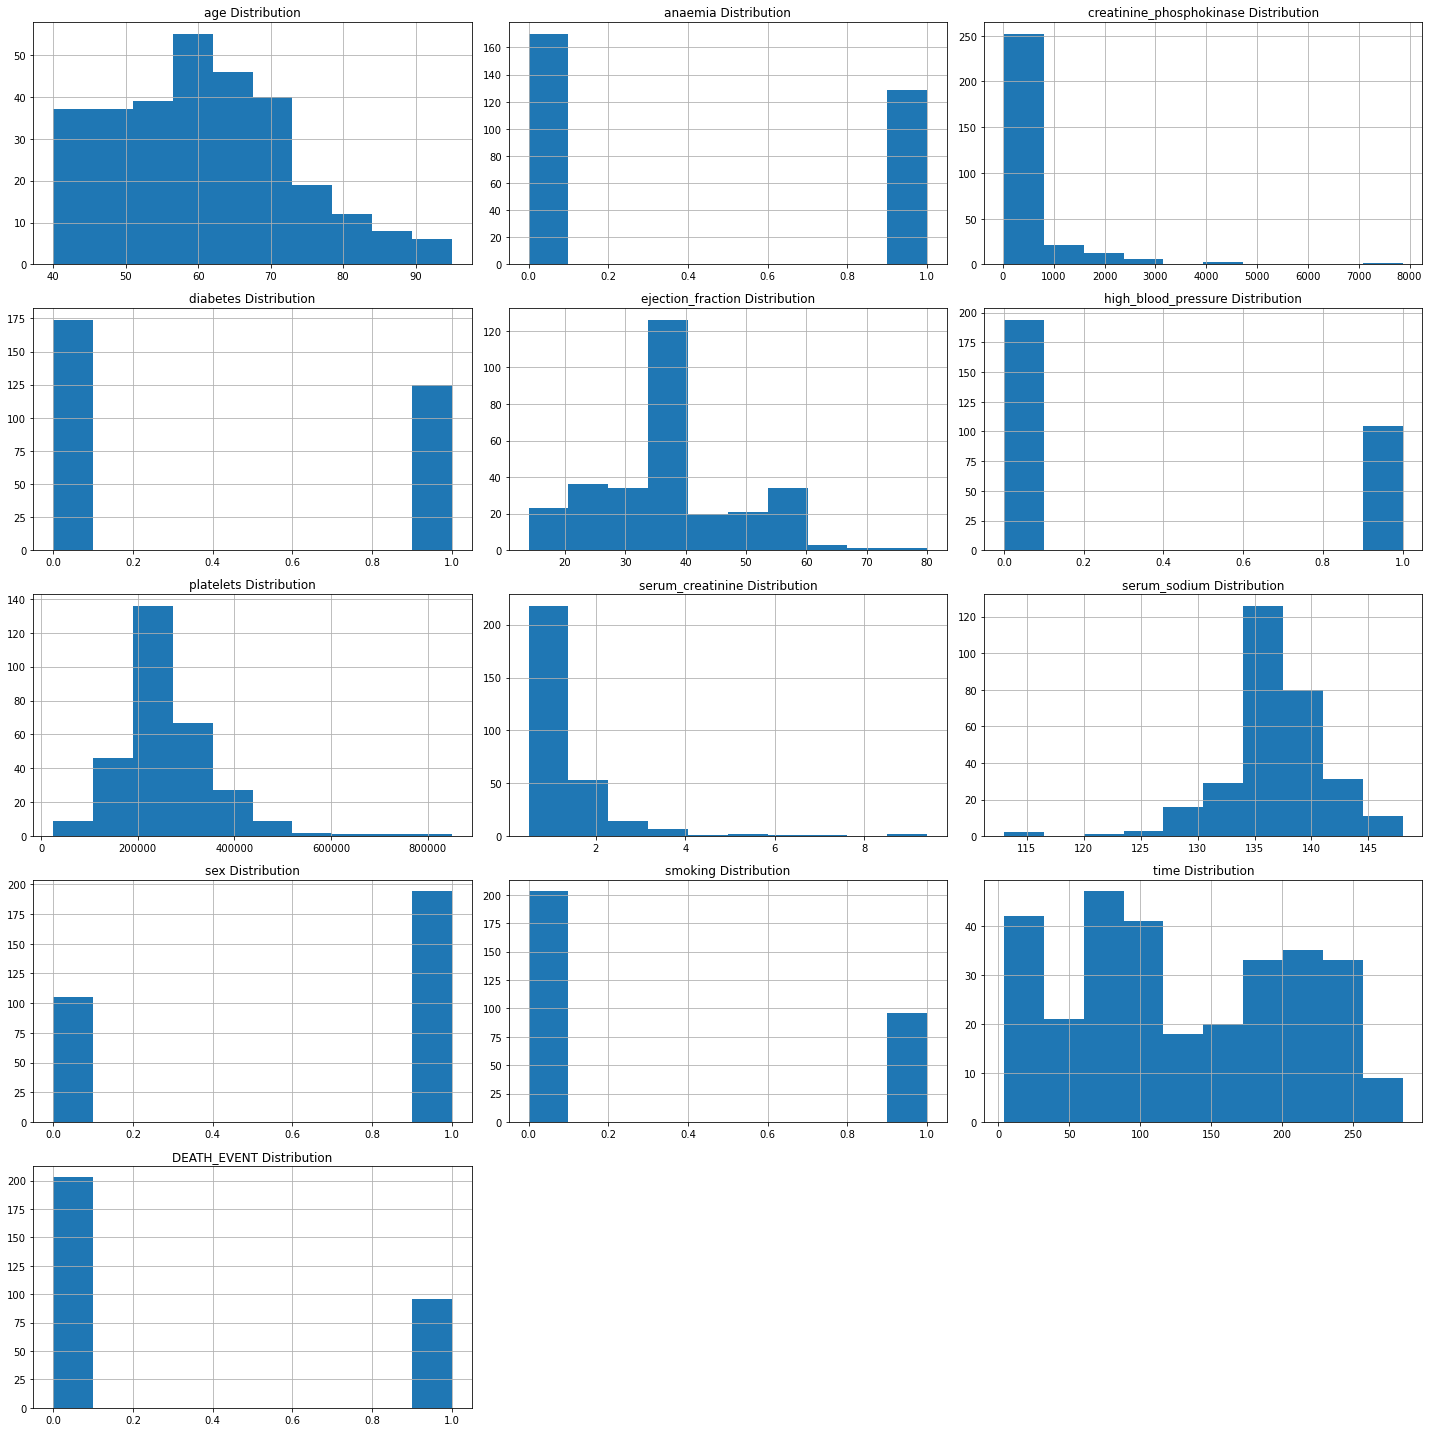

In [12]:
fig=plt.figure(figsize=(20,20))
for key,column in enumerate(df1.columns):
    #print(key)
    ax = fig.add_subplot(5,3,key+1)
    df1[column].hist(bins=10,ax=ax)
    ax.set_title(column + " Distribution")
fig.tight_layout()  
plt.show()

## First Try at Simple Linear Regression Model Using Sci-Kit Learn APIs

In [13]:
x_values = df1[['time']]
x_values.head()

,time
0,4
1,6
2,7
3,7
4,8


In [14]:
y_values = df1[['age']]
y_values.head()

,age
0,75.0
1,55.0
2,65.0
3,50.0
4,65.0


##### Initial look at correlation with r^2

In [15]:
LR1 = LinearRegression()
LR1.fit(x_values, y_values)
rSquared = LR1.score(x_values, y_values)
rSquared

0.05020665682876457

#### Very low rSqaured value -> There is some trend but values are very spread out

#### In the following cells I will split the data into testing and training data, use them to fit a linear regression model, then test it on the testing data, and finally perform cross validation to analyze any differences between different splits of data.

#### Train and Test Data Split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.25)

#### Fit and Predict

In [17]:
LR2 = LinearRegression()
LR2.fit(x_train,y_train)
bias = LR2.intercept_
w0 = LR2.coef_
yhat_train = LR2.predict(x_train)
print('Bias: ', bias, '\nWeight: ', w0)

Bias:  [64.58285549] 
Weight:  [[-0.03186403]]


#### Bias: 64.58285549
#### Weight: -0.03186403

#### Evaluation

In [18]:
yhat_test = LR2.predict(x_test)

In [19]:
#Calculating Loss without tensorFlow

loss_train = np.mean((yhat_train - y_train)**2)
loss_test = np.mean((yhat_test - y_test)**2)

print('Loss for Training Data: ', loss_train, '\n Loss for Testing Data: ', loss_test)

Loss for Training Data:  age    139.938357
dtype: float64 
 Loss for Testing Data:  age    116.788825
dtype: float64


##### Interesting Difference in Loss Values, lets see how each looks

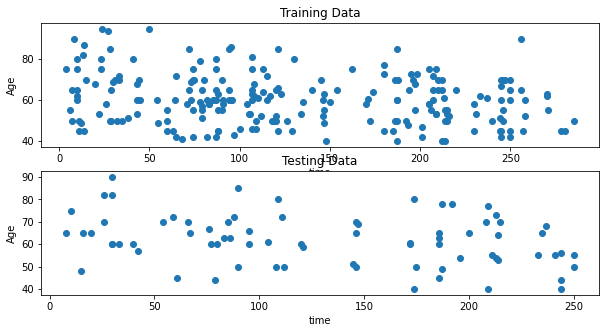

In [20]:
#fig,ax=plt.subplots(len(Days),1,figsize=(20,50), sharey = True)
fig,ax = plt.subplots(2,1,figsize=(10,5))
ax[0].scatter(x_train,y_train)
ax[0].set_title('Training Data')
ax[0].set_xlabel('time')
ax[0].set_ylabel('Age')
ax[1].scatter(x_test,y_test)
ax[1].set_title('Testing Data')
ax[1].set_xlabel('time')
ax[1].set_ylabel('Age')

plt.show()

Seems like the loss for the testing data is lower because there are less values near the upper and lower limits of the data.

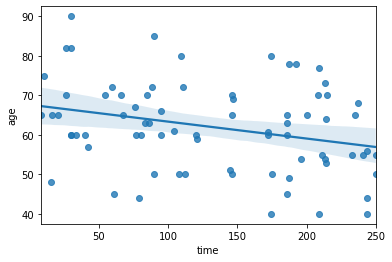

In [21]:
sns.regplot(x_test,y_test)

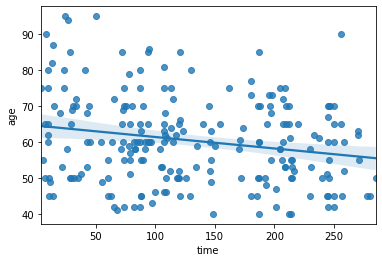

In [22]:
sns.regplot(x_train,y_train)

#### Loss is lower for the test data because there are more values closer to the regression line

#### Let's see if cross validation helps are correlation scores

In [23]:
LR3 = LinearRegression()
scores = cross_val_score(LR3, x_values,y_values,cv = 4)

In [24]:
print('R Squared Scores from using 4 different partitions of the the data:\n',scores)

R Squared Scores from using 4 different partitions of the the data:
 [-0.00980563 -0.01881844 -0.01354653  0.01744358]


##### Cross_val_score divides the data into 4 different partitions (from cv = 4) and then tries each combination of 3 as training sets and 1 testing set, and then runs the fit and score method for each partition.

In all partitions, the correlation coefficient was extremely low which explains the high loss.

## Second Try at Linear Regression using approach from assignment 2

In [25]:
# import necessary classes and functionsclass LinearModel(object):
class LinearModel(object):
    def __init__(self):
        self.w0 = tf.Variable(5.0)
        self.bias = tf.Variable(4.0)


    def __call__(self, x): #-> trying to generate y^
        return (self.w0 * x) + self.bias

        

def loss(yActual, yModel):
    loss = tf.reduce_mean(tf.square(yActual - yModel))
    return loss

def train(Model, x,y,lr = 1.3):
    with tf.GradientTape() as t:
        modelLoss = loss(y,Model(x))
    w0Change,biasChange = t.gradient(modelLoss,[Model.w0,Model.bias])
    
    Model.w0.assign_sub(w0Change * lr)
    Model.bias.assign_sub(biasChange * lr)



In [26]:
yVal2 = np.array(y_values)
xVal2 = np.array(x_values)

Weight: nan
Bias: nan
Final Loss: nan


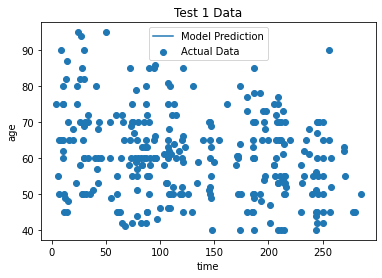

In [27]:

w0_s =[]
bias_s =[]
linear = LinearModel()
#yhat = linear.__call__(x)
for i in range(1,101):
    w0_s.append(linear.w0)
    bias_s.append(linear.bias)
    yhat = linear(xVal2)
    Loss = loss(yVal2,yhat)
    train(linear,xVal2,yVal2)
    #print(Loss.numpy())
        
print('Weight: ' + str(linear.w0.numpy()))
print('Bias: ' + str(linear.bias.numpy()))
print('Final Loss: ' + str(loss(yVal2,yhat).numpy()))
    
yhat = linear(xVal2)
plt.scatter(xVal2,yVal2)
plt.plot(xVal2,yhat)
plt.xlabel('time')
plt.ylabel('age')
plt.legend(['Model Prediction','Actual Data'])
plt.title('Test 1 Data')
plt.show()

### If 'print(loss.Numpy()' wasn't commented out you'd see how the loss jumps to infinity and then goes to 'nan' type -> Exploding Gradient 
##### (Commented out to conserve space)

### Linear Regression Conclusion
#### The linear regressin model performed very poorly because none of the features were vary linearly related. Scaling may have helped by as you can see from the correlation matrix, no two features were nicely correlated. More feature engineering would be needed to make linear regression useful.

# Logistic Regression with Sci-Kit Learn APIs

Below is a function that plots a confusion matrix created from the scikit confusion_matrix API. This function comes from a notebook I worked with over the summer in my data sciennce course

In [272]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Get our x_values or independent variables

In [28]:
xlog = df1.iloc[:,:12]
xlog.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


#### Get our y_values or dependent variable of Death Event

In [29]:
ylog = df1.loc[:,'DEATH_EVENT']
ylog.head

<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64>

#### Normalizing our Data
##### .StandardScaler() standardize the features by removing the mean and scaling to unit variance. Works on normally distributed data which not all our features were based on the histograms. Will try a different scaler below.
##### The standard score of a sample x is calculated as: z = (x - u) / s
###### where u is the mean of the training samples, and s is the standard deviation of the training samples.

##### .fit() used here computes the mean and standard deviation for later

##### .transform() used her centers the values around 0

### Ultimately the data will have a mean value 0 and standard deviation of 1.
##### These methods were adapted from an IBM skills lab notebook I worked on in my summmer data science course

In [30]:
xlog_scaled = preprocessing.StandardScaler().fit(xlog).transform(xlog) #tansform may be redundant
xlog_scaled[0:1]

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04,
        -8.47579380e-01, -1.53055953e+00,  1.35927151e+00,
         1.68164843e-02,  4.90056987e-01, -1.50403612e+00,
         7.35688190e-01, -6.87681906e-01, -1.62950241e+00]])

### Train and Test Dataset

In [285]:
xlog_train, xlog_test, ylog_train, ylog_test = train_test_split(xlog_scaled, ylog, test_size=0.3) #random state shuffles the data

##### I'm not entirely sure what the solver 'liblinear' does other than that it is a different way than the default method of optimizing parameters using different loss/error calculations.
##### I included both for comparison.

#### Train and Predict

In [286]:
Log_Reg = LogisticRegression() #defaults to solver = 'lbfgs'
Log_Reg.fit(xlog_train,ylog_train)
yhat = Log_Reg.predict(xlog_test)
yhat

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1], dtype=int64)

In [287]:
Log_Reg2 = LogisticRegression(solver = 'liblinear')
Log_Reg2.fit(xlog_train,ylog_train)
yhat2 = Log_Reg2.predict(xlog_test)
yhat2

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1], dtype=int64)

#### Log Loss for non liblinear solver

In [288]:
Log_Loss = log_loss(ylog_test,yhat)
Log_Loss

3.83769512815209

#### Log Loss for liblinear solver

In [289]:
Log_Loss2 = log_loss(ylog_test,yhat2)
Log_Loss2

3.83769512815209

#### Both predictions turned out exactly the same regardless of the solver.

##### Log loss isn't intuitive of the success of the prediction, however the Jaccard Index is. The Jaccard Index compares the predicted binary results with the actual results, a score of 1.0 means every classification was correct while 0 means none were.

In [290]:
from sklearn.metrics import jaccard_score

In [291]:
jaccard_score(ylog_test, yhat)

0.6551724137931034

In [292]:
jaccard_score(ylog_test, yhat2)

0.6551724137931034

### Trying the same Logistric Regression Approach with different scaler.

##### Try Robust Scaler to see if eliminating some 'outliers' helps 

In [305]:
xlog_scaled3 = preprocessing.RobustScaler().fit(xlog).transform(xlog)
xlog_scaled3[0:1]

array([[ 0.78947368,  0.        ,  0.7132116 ,  0.        , -1.2       ,
         1.        ,  0.03296703,  1.6       , -1.16666667,  0.        ,
         0.        , -0.85384615]])

In [306]:
xlog_train3, xlog_test3, ylog_train3, ylog_test3 = train_test_split(xlog_scaled3, ylog, test_size=0.30) #random state shuffles the data

Log_Reg3 = LogisticRegression()
Log_Reg3.fit(xlog_train3,ylog_train3)
yhat3 = Log_Reg.predict(xlog_test3)
yhat3

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [307]:
Log_Loss3 = log_loss(ylog_test3,yhat3)
Log_Loss3

6.524079940975374

In [308]:
jaccard_score(ylog_test3, yhat3)

0.5

##### Performed worse than when using Standard Scaler so outliers are not the problem. We can also see there are not many outliers based on the distributions in the his

### Logistic Regression Conclusion
The best model had a jaccard score of .629 meaning about 63% of its predictions were correct. Further testing could be done to see if possibly excluding some features would help its classification. Below is a confusion matrix of the model predictions.

Confusion matrix, without normalization
[[19  4]
 [ 6 61]]


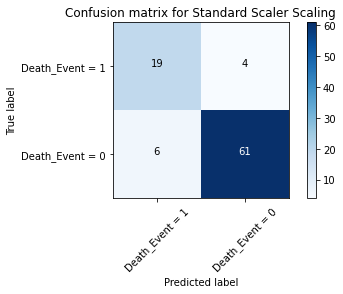

In [309]:
CM = confusion_matrix(ylog_test, yhat2, labels=[1,0])
#np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(CM, classes=['Death_Event = 1','Death_Event = 0'],normalize= False,  title='Confusion matrix for Standard Scaler Scaling')

As you can see from the confusion matrix, 61 times it classified the non death event correctly while 4 times it got it wrong. Meanwhile, 19 times, it classified the death event correctly and 6 times it got it wrong.

Confusion matrix, without normalization
[[17  7]
 [10 56]]


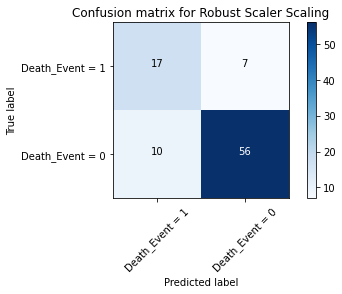

In [311]:
CM3 = confusion_matrix(ylog_test3, yhat3, labels=[1,0])
#np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(CM3, classes=['Death_Event = 1','Death_Event = 0'],normalize= False,  title='Confusion matrix for Robust Scaler Scaling')

As you can see the logistic regression that used the robust scaler method performed worse but not terribly.

##### Below is a random Evaluation I don't fully understand but thought sounded interesting

##### predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [180]:
yhat_prob = Log_Reg.predict_proba(xlog_test)
yhat_prob

array([[0.9870718 , 0.0129282 ],
       [0.60970424, 0.39029576],
       [0.97978818, 0.02021182],
       [0.93310573, 0.06689427],
       [0.99240813, 0.00759187],
       [0.40854209, 0.59145791],
       [0.97449983, 0.02550017],
       [0.55578541, 0.44421459],
       [0.91141527, 0.08858473],
       [0.83260284, 0.16739716],
       [0.70317929, 0.29682071],
       [0.95753701, 0.04246299],
       [0.93425747, 0.06574253],
       [0.7089295 , 0.2910705 ],
       [0.99570706, 0.00429294],
       [0.99570462, 0.00429538],
       [0.93740911, 0.06259089],
       [0.53222902, 0.46777098],
       [0.53233733, 0.46766267],
       [0.59256378, 0.40743622],
       [0.85667856, 0.14332144],
       [0.03309141, 0.96690859],
       [0.14108223, 0.85891777],
       [0.98265064, 0.01734936],
       [0.76315382, 0.23684618],
       [0.89341955, 0.10658045],
       [0.68443307, 0.31556693],
       [0.91391138, 0.08608862],
       [0.92393984, 0.07606016],
       [0.96641924, 0.03358076],
       [0.

## Support Vector Machine

First get our x and y values

In [247]:
xSVM = df1.iloc[:,:12]

ySVM = df1.iloc[:,12]
ySVM.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

Split Data

In [248]:
x_trainSVM, x_testSVM, y_trainSVM, y_testSVM = train_test_split( xSVM, ySVM, test_size=0.3, random_state=4)

The .fit takes longer when data isn't scaled but I hope to see it still gives good results without it. 

In [250]:
SVM = SVC(kernel='linear', C=1.0, random_state=1)
SVM.fit(x_trainSVM, y_trainSVM)

SVC(kernel='linear', random_state=1)

In [251]:
yhatSVM1 = SVM.predict(x_testSVM)
yhatSVM1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0], dtype=int64)

In [252]:
jaccard_score(y_testSVM, yhatSVM1)

0.4666666666666667

In [312]:
print (classification_report(y_testSVM, yhatSVM1))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88        66
           1       0.70      0.58      0.64        24

    accuracy                           0.82        90
   macro avg       0.78      0.75      0.76        90
weighted avg       0.82      0.82      0.82        90



In [325]:
SVM2 = SVC(kernel='linear', C=2, gamma = 0.0001)
SVM2.fit(x_trainSVM, y_trainSVM)

yhatSVM2 = SVM2.predict(x_testSVM)
yhatSVM2

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0], dtype=int64)

In [326]:
jaccard_score(y_testSVM, yhatSVM2)

0.4666666666666667

In [327]:
print (classification_report(y_testSVM, yhatSVM2))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88        66
           1       0.70      0.58      0.64        24

    accuracy                           0.82        90
   macro avg       0.78      0.75      0.76        90
weighted avg       0.82      0.82      0.82        90



### SVM Conclusion
#### The jaccard score is a metric for simularity between predicted and actual values, so it is strange that showed a low similarity while the precision, recall, and f1-score were almost all greater than .60. Changing the solver to anything other than 'linear' yield a yhat array of only 0's classifications. Meanwhile, changing C and gamma had no noticable affect either. Lets look at a confusion matrix to get a better look at how it did.

Confusion matrix, without normalization
[[14 10]
 [ 6 60]]


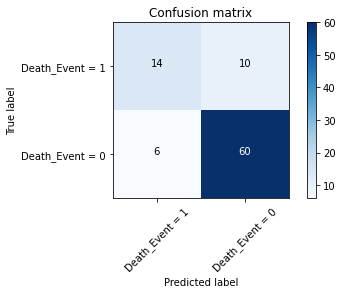

In [329]:
CM2 = confusion_matrix(y_testSVM, yhatSVM2, labels=[1,0])
#np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(CM2, classes=['Death_Event = 1','Death_Event = 0'],normalize= False,  title='Confusion matrix')

From the confusion matrix you can see that 60 times the model predicted a non death event and got it right 60, and 10 times predicted a non death event when it wasn't. Meanwhile, 14 times it predicted a death event and got it right and 6 times got it wrong. So it was better at predicting non-deaths than it was at predicting deaths. It seems as though I again may be using the jaccard similarity score wrong or over believing in its score.

# End